# 利用gradient descent 找出單一變數函數中的minimum

## 1. 載入套件

In [97]:
%matplotlib inline
from ipywidgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
import math

## 2. 產生函數 這邊假設 $f(x) = (x - 4)(3x - 2)(x + 2)(x + 4)$ 並畫出函數圖形

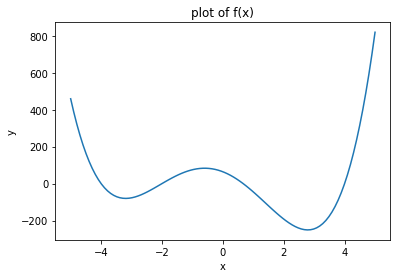

In [98]:
x = np.linspace(-5, 5, 100)
y = (x - 4) * (3*x - 2) * (x + 2) * (x + 4)

plt.plot(x, y);
plt.xlabel("x");
plt.ylabel("y");
plt.title("plot of f(x)");

## 3. 算出 $f'(x) = 12x^3 + 12x^2 - 104x - 64$ 並定義gradient descent 函式

In [99]:
def gradient_descent(x, n):
    x -= n * (12 * math.pow(x, 3) + 12 * math.pow(x, 2) - 104 * x - 64)
    return x

## 4. 定義find_min根據x初始值開始帶入gradient_descent 尋找minimum(learning rate =                    0.005)

In [100]:
def find_min(start_x, try_times):
    # history 紀錄過去嘗試過的x
    history = []
    # learning rate = 0.005
    n = 0.005
    
    for i in range(0, try_times):
        history += [start_x]
        start_x = gradient_descent(start_x, n)
        
    return history

## 5. 隨機生成x初始值，帶入draw_process看出gradient_descent的過程與結果

In [114]:
start_x = np.random.uniform(-5, 5)

def draw_process(start_x, try_times = 5):
    print("starting from x = ", start_x)
    # 先畫出函數圖形
    plt.plot(x, y, c = 'b');
    plt.xlabel("x");
    plt.ylabel("y");
    plt.title("plot of f(x)");
    
    # 印出gradient descent中各個點的座標
    X = np.array(find_min(start_x, try_times))
    Y = (X - 4) * (3*X - 2) * (X + 2) * (X + 4)
    print("\n(x, y) positions are: \n")
    print(np.c_[X, Y])
    
    # 畫出gradient descent中的各個點(由淺到深)
    alphas = np.linspace(0, 1, len(X))
    rgba_colors = np.zeros((len(X),4))
    rgba_colors[:, 0] = 1.0
    rgba_colors[:, 3] = alphas
    plt.scatter(X, Y, color = rgba_colors);
    
    # 以十字標示出local min的點
    plt.axvline(x=X[len(X) - 1], c = 'r')
    plt.axhline(y=Y[len(X) - 1], c = 'r')

# 使用interact 決定gradient descent計算次數
interact(draw_process, start_x = fixed(start_x), try_times = (1, 20))

interactive(children=(IntSlider(value=5, description='try_times', max=20, min=1), Output()), _dom_classes=('wi…

<function __main__.draw_process(start_x, try_times=5)>